In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv("bank-additional-full.csv", sep=';', encoding='utf-8')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [9]:
total = 36548 + 4640
yes_pct = (4640 / total) * 100
no_pct = (36548 / total) * 100

print(f"Yes: {yes_pct:.2f}%")
print(f"No: {no_pct:.2f}%")

Yes: 11.27%
No: 88.73%


In [41]:
df.shape

(41188, 48)

In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [12]:
df.duplicated().sum()

12

In [49]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: ['nonexistent' 'failure' 'success']
y: ['no' 'yes']


In [15]:
df.replace('unknown', np.nan, inplace=True)

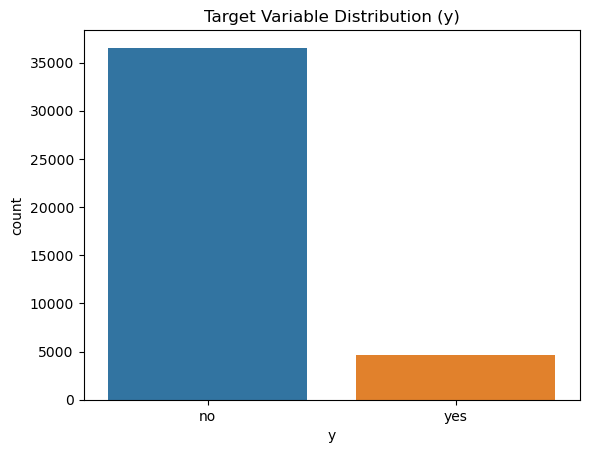

In [50]:
# Visualize target variable distribution
sns.countplot(x='y', data=df)
plt.title('Target Variable Distribution (y)')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

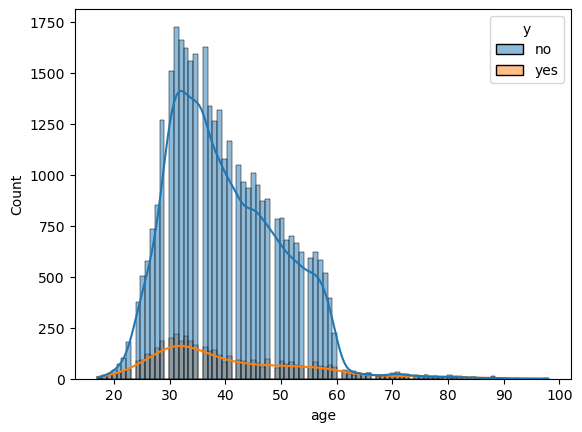

In [52]:
sns.histplot(data=df, x='age', hue='y', kde=True)

<Axes: xlabel='y', ylabel='duration'>

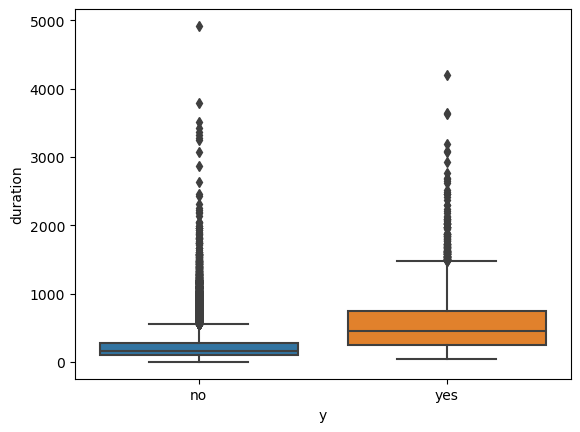

In [53]:
sns.boxplot(x='y', y='duration', data=df)

In [54]:
#Data Preprocessing 
df['y'] = df['y'].map({'no': 0, 'yes': 1})

In [55]:
# one hot encoding
df = pd.get_dummies(df, drop_first=True)

In [56]:
#SCALING
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [57]:
X = df.drop('y', axis=1)
y = df['y']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [59]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())

Before SMOTE: y
0    29238
1     3712
Name: count, dtype: int64
After SMOTE: y
0    29238
1    29238
Name: count, dtype: int64


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000)

In [84]:
y_pred = model.predict(X_test)

acc_log = accuracy_score(y_test, y_pred)
prec_log = precision_score(y_test, y_pred, pos_label=1)
rec_log = recall_score(y_test, y_pred, pos_label=1)
f1_log = f1_score(y_test, y_pred, pos_label=1)

print("Accuracy:", acc_log)
print("Precision:", prec_log)
print("Recall:", rec_log)
print("F1 Score:", f1_log)


Accuracy: 0.884316581694586
Precision: 0.49159381304640215
Recall: 0.7877155172413793
F1 Score: 0.6053830227743271


In [62]:
from sklearn.tree import DecisionTreeClassifier

# Train
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [85]:
# Predict
y_pred_dt = dt.predict(X_test)

# Evaluation metrics
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt, pos_label=1)
rec_dt = recall_score(y_test, y_pred_dt, pos_label=1)
f1_dt = f1_score(y_test, y_pred_dt, pos_label=1)

# Display results
print("Decision Tree Accuracy:", acc_dt)
print("Precision:", prec_dt)
print("Recall:", rec_dt)
print("F1 Score:", f1_dt)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8834668608885652
Precision: 0.48596491228070177
Recall: 0.5969827586206896
F1 Score: 0.5357833655705996

Confusion Matrix:
 [[6724  586]
 [ 374  554]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      7310
           1       0.49      0.60      0.54       928

    accuracy                           0.88      8238
   macro avg       0.72      0.76      0.73      8238
weighted avg       0.90      0.88      0.89      8238



In [64]:
from sklearn.ensemble import RandomForestClassifier

# Train
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [65]:
# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9116290361738286
Confusion Matrix:
 [[6855  455]
 [ 273  655]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      7310
           1       0.59      0.71      0.64       928

    accuracy                           0.91      8238
   macro avg       0.78      0.82      0.80      8238
weighted avg       0.92      0.91      0.92      8238



In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_dist = {
    'n_estimators': randint(50, 300),           # Number of trees
    'max_depth': randint(5, 30),                # Max depth of tree
    'min_samples_split': randint(2, 10),        # Min samples to split a node
    'min_samples_leaf': randint(1, 10),         # Min samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']    # Number of features to consider at split
}

# Randomized search with 5-fold CV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,               # Number of parameter settings sampled
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1               # Use all cores
)

# Fit to training data
rf_random.fit(X_train, y_train)

# Best parameters
print("Best RF parameters:", rf_random.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RF parameters: {'max_depth': 29, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 104}


In [86]:
# Best estimator from hyperparameter tuning
best_rf = rf_random.best_estimator_

# Predict on test set
y_pred_rf = best_rf.predict(X_test)

# Evaluation metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, pos_label=1)
rec_rf = recall_score(y_test, y_pred_rf, pos_label=1)
f1_rf = f1_score(y_test, y_pred_rf, pos_label=1)

# Display results
print("Random Forest Accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", rec_rf)
print("F1 Score:", f1_rf)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9208545763534839
Precision: 0.7211538461538461
Recall: 0.4849137931034483
F1 Score: 0.5798969072164949

Confusion Matrix:
 [[7136  174]
 [ 478  450]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      7310
           1       0.72      0.48      0.58       928

    accuracy                           0.92      8238
   macro avg       0.83      0.73      0.77      8238
weighted avg       0.91      0.92      0.91      8238



In [68]:
from sklearn.ensemble import GradientBoostingClassifier

# Train
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=42)

In [87]:
# Predict on test data
y_pred_gb = gb.predict(X_test)

# Evaluation metrics
acc_gb = accuracy_score(y_test, y_pred_gb)
prec_gb = precision_score(y_test, y_pred_gb, pos_label=1)
rec_gb = recall_score(y_test, y_pred_gb, pos_label=1)
f1_gb = f1_score(y_test, y_pred_gb, pos_label=1)

# Display results
print("Gradient Boosting Accuracy:", acc_gb)
print("Precision:", prec_gb)
print("Recall:", rec_gb)
print("F1 Score:", f1_gb)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8868657441126487
Precision: 0.49878345498783455
Recall: 0.8836206896551724
F1 Score: 0.6376360808709176

Confusion Matrix:
 [[6486  824]
 [ 108  820]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      7310
           1       0.50      0.88      0.64       928

    accuracy                           0.89      8238
   macro avg       0.74      0.89      0.79      8238
weighted avg       0.93      0.89      0.90      8238



In [70]:
from xgboost import XGBClassifier

# Train
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [71]:
# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9101723719349356
Confusion Matrix:
 [[6874  436]
 [ 304  624]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      7310
           1       0.59      0.67      0.63       928

    accuracy                           0.91      8238
   macro avg       0.77      0.81      0.79      8238
weighted avg       0.92      0.91      0.91      8238



In [72]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_dist_xgb = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 15),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5]
}

xgb_random = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist_xgb,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

xgb_random.fit(X_train, y_train)

print("Best XGB parameters:", xgb_random.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best XGB parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 157, 'subsample': 1.0}


In [88]:
# Use the best model found by RandomizedSearchCV
best_xgb = xgb_random.best_estimator_

# Predict on test data
y_pred_xgb = best_xgb.predict(X_test)

# Evaluation metrics
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb, pos_label=1)
rec_xgb = recall_score(y_test, y_pred_xgb, pos_label=1)
f1_xgb = f1_score(y_test, y_pred_xgb, pos_label=1)

# Display results
print("XGBoost Accuracy:", acc_xgb)
print("Precision:", prec_xgb)
print("Recall:", rec_xgb)
print("F1 Score:", f1_xgb)

print("\nXGB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nXGB Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9226754066521
Precision: 0.691699604743083
Recall: 0.5657327586206896
F1 Score: 0.6224066390041495

XGB Confusion Matrix:
 [[7076  234]
 [ 403  525]]

XGB Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      7310
           1       0.69      0.57      0.62       928

    accuracy                           0.92      8238
   macro avg       0.82      0.77      0.79      8238
weighted avg       0.92      0.92      0.92      8238



<Figure size 1000x600 with 0 Axes>

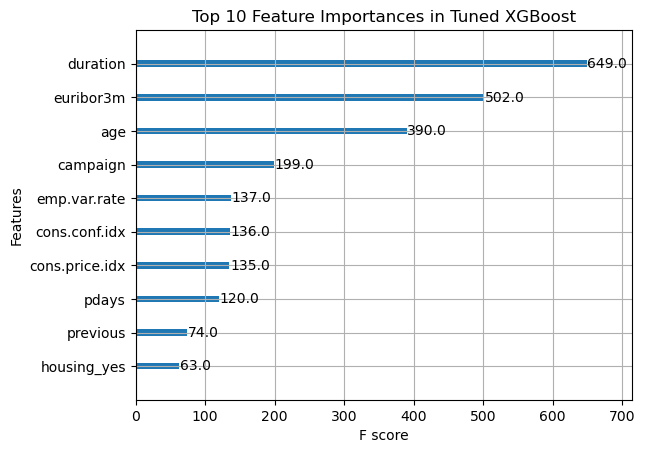

In [89]:
from xgboost import plot_importance

# Assuming your model is named 'xgb_model' and you have X_test and y_test

# Feature importance plot
plt.figure(figsize=(10,6))
plot_importance(best_xgb, max_num_features=10)
plt.title('Top 10 Feature Importances in Tuned XGBoost')
plt.show()

In [90]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'Accuracy': [acc_log, acc_dt, acc_rf, acc_gb, acc_xgb],
    'Precision': [prec_log, prec_dt, prec_rf, prec_gb, prec_xgb],
    'Recall': [rec_log, rec_dt, rec_rf, rec_gb, rec_xgb],
    'F1 Score': [f1_log, f1_dt, f1_rf, f1_gb, f1_xgb]
})

print(results)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.884317   0.491594  0.787716  0.605383
1        Decision Tree  0.883467   0.485965  0.596983  0.535783
2        Random Forest  0.920855   0.721154  0.484914  0.579897
3    Gradient Boosting  0.886866   0.498783  0.883621  0.637636
4              XGBoost  0.922675   0.691700  0.565733  0.622407


In [95]:
suggestions = """
3. Suggestions to the Bank Marketing Team

- Target specific age groups**: Customers between the ages of 30–60 showed higher interest in term deposits. Marketing efforts can be more focused 
on this demographic.
- Focus on job categories with higher conversion**: Retired individuals and students were more likely to subscribe. Custom marketing messages can be 
designed for these segments.
- Use cellular contact methods**: Customers contacted via cellular phones had a better response rate compared to telephone.
- Optimal contact months**: The months of May, August, and October showed higher subscription rates. These periods are ideal for campaign launches.
- Shorter, high-impact campaigns**: Customers were more likely to respond positively with fewer contact attempts. Avoid over-contacting the same 
client.

By tailoring the campaigns using these insights, the bank can improve the conversion rate for term deposits.
"""

print(suggestions)


3. Suggestions to the Bank Marketing Team

- Target specific age groups**: Customers between the ages of 30–60 showed higher interest in term deposits. Marketing efforts can be more focused 
on this demographic.
- Focus on job categories with higher conversion**: Retired individuals and students were more likely to subscribe. Custom marketing messages can be 
designed for these segments.
- Use cellular contact methods**: Customers contacted via cellular phones had a better response rate compared to telephone.
- Optimal contact months**: The months of May, August, and October showed higher subscription rates. These periods are ideal for campaign launches.
- Shorter, high-impact campaigns**: Customers were more likely to respond positively with fewer contact attempts. Avoid over-contacting the same 
client.

By tailoring the campaigns using these insights, the bank can improve the conversion rate for term deposits.



In [96]:
## Model Comparison Report
Model_Comparison_Report = """
Below is a summary of the performance of two classification models tested:

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.884317   0.491594  0.787716  0.605383
1        Decision Tree  0.883467   0.485965  0.596983  0.535783
2        Random Forest  0.920855   0.721154  0.484914  0.579897
3    Gradient Boosting  0.886866   0.498783  0.883621  0.637636
4              XGBoost  0.922675   0.691700  0.565733  0.622407


Based on the above metrics, the model with the best balance between precision and recall can be selected for production use.
"""
print(Model_Comparison_Report)


Below is a summary of the performance of two classification models tested:

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.884317   0.491594  0.787716  0.605383
1        Decision Tree  0.883467   0.485965  0.596983  0.535783
2        Random Forest  0.920855   0.721154  0.484914  0.579897
3    Gradient Boosting  0.886866   0.498783  0.883621  0.637636
4              XGBoost  0.922675   0.691700  0.565733  0.622407


Based on the above metrics, the model with the best balance between precision and recall can be selected for production use.



In [98]:
Challenges_Faced = """
Challenges :-
### 1. Handling Missing and Unknown Values
Many columns had "unknown" as values, especially in features like job, education, and contact method. These were replaced with "NaN" and handled either through removal or imputation to improve model accuracy.

### 2. Class Imbalance
The target variable "y" was highly imbalanced (~11% "yes" and 89% "no"). This would bias models toward predicting "no". To address this, SMOTE (Synthetic Minority Over-sampling Technique) was used to balance the dataset before training.

### 3. Categorical Encoding
Several features were categorical. One-hot encoding was applied to convert them into numeric form, allowing them to be used in models like logistic regression and decision trees.

### 4. Feature Selection
Although "duration" is a strong predictor, it was not used in modeling since it’s only known after the call, which would not make the model realistic for predictive purposes.

### 5. Model Evaluation
Different models like Logistic Regression and Decision Tree were trained and evaluated using multiple metrics (accuracy, precision, recall, F1-score) to ensure a reliable comparison.

These steps helped build a robust and interpretable classification model suitable for the bank's marketing application.
"""
print(Challenges_Faced)


Challenges :-
### 1. Handling Missing and Unknown Values
Many columns had "unknown" as values, especially in features like job, education, and contact method. These were replaced with "NaN" and handled either through removal or imputation to improve model accuracy.

### 2. Class Imbalance
The target variable "y" was highly imbalanced (~11% "yes" and 89% "no"). This would bias models toward predicting "no". To address this, SMOTE (Synthetic Minority Over-sampling Technique) was used to balance the dataset before training.

### 3. Categorical Encoding
Several features were categorical. One-hot encoding was applied to convert them into numeric form, allowing them to be used in models like logistic regression and decision trees.

### 4. Feature Selection
Although "duration" is a strong predictor, it was not used in modeling since it’s only known after the call, which would not make the model realistic for predictive purposes.

### 5. Model Evaluation
Different models like Logistic Regress